# Building Classifiers

In [2]:
import Classification_Utils as cu
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Binary flag determines whether to convert data to 1 and 0 for presence/absence

## Load and combine data from all tissues

In [8]:
df = pd.read_csv('../../Data/Random-Data-Set/train_cna_random.csv')
print(df.shape)

(75, 17157)


In [9]:
df.head()

,OR4F5,KLHL17,PLEKHN1,HES4,ISG15,AGRN,RNF223,C1orf159,TTLL10,TNFRSF18,...,NSMF,PNPLA7,MRPL41,DPH7,ZMYND19,ARRDC1,C9orf37,EHMT1,FAM157B,labels
0,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,real
1,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,real
2,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,real
3,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,...,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,real
4,-0.18,0.13,0.27,0.27,0.27,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.13,-0.14,-0.14,-0.14,-0.14,-0.14,-0.14,-0.14,-0.14,real


## Map each column to a corresponding label

In [10]:
column_names = df.columns.values.tolist()
#seporate labels from the main data
labels = df['labels']
df = df.drop(columns=['labels'])
#impute the NA with 0
df = df.fillna(0)
df.head()

,OR4F5,KLHL17,PLEKHN1,HES4,ISG15,AGRN,RNF223,C1orf159,TTLL10,TNFRSF18,...,ENTPD8,NSMF,PNPLA7,MRPL41,DPH7,ZMYND19,ARRDC1,C9orf37,EHMT1,FAM157B
0,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
1,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
2,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
3,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,...,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07
4,-0.18,0.13,0.27,0.27,0.27,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.10,-0.13,-0.14,-0.14,-0.14,-0.14,-0.14,-0.14,-0.14,-0.14


## Make train-test split

In [11]:
train_df, test_df, train_labels, test_labels = train_test_split(
    df, labels, 
    test_size=0.30,    # 30% of the data held out in test set
    random_state=0,    # Setting random_state ensures the same train/test split occurs each time this is run
    stratify=labels)   # Maintain ratio of tissues represented in each set

train_features = train_df.columns.values.tolist()

In [12]:
# std_scaler = StandardScaler()
# train_df = std_scaler.fit_transform(train_df)
# test_df = std_scaler.fit_transform(test_df)

# min_max_scaler = MinMaxScaler()
# min_max_train_df = min_max_scaler.fit_transform(train_df)
# min_max_test_df = min_max_scaler.fit_transform(test_df)

## Train various classifiers, using cross-validation to produce an accuracy score (Supplementary Figure XXX)

In [13]:
NUM_SPLITS = 100 # number of train/test splits in cross validation

In [14]:
import time

### KNN

In [15]:
start = time.time()
knn = cu.knn_model_crossval(train_df, train_labels, NUM_SPLITS)
end = time.time()
print("Runtime:", (end - start)/60, "minutes")

accuracy: 0.72 (+/- 0.07)
Runtime: 0.07795104583104452 minutes


In [16]:
#MLP TESTING AREA
start = time.time()
mlp = cu.mlp_crossval(train_df, train_labels, NUM_SPLITS)
end = time.time()
print("Runtime:", (end - start)/60, "minutes")

MLP is created
accuracy: 0.85 (+/- 0.23)
Runtime: 11.08390534321467 minutes


### Logistic Regression

In [17]:
start = time.time()
lr = cu.logistic_regression_model_crossval(train_df, train_labels, NUM_SPLITS)
end = time.time()
print("Runtime:", (end - start)/60, "minutes")

accuracy: 0.93 (+/- 0.11)
Runtime: 0.47484201987584435 minutes


### Naive Bayes
* Gaussian
* Multinomial

In [18]:
start = time.time()
gnb = cu.bayes_gaussian_model_crossval(train_df, train_labels, NUM_SPLITS)
end = time.time()
print("Runtime:", (end - start)/60, "minutes")

accuracy: 1.00 (+/- 0.00)
Runtime: 0.19755465189615887 minutes


In [19]:
start = time.time()
mnb = cu.bayes_multinomial_model_crossval(train_df, train_labels, NUM_SPLITS)
end = time.time()
print("Runtime:", (end - start)/60, "minutes")

ValueError: Input X must be non-negative

### SVC 

In [20]:
start = time.time()
svc = cu.SVC_model_crossval(train_df, train_labels, NUM_SPLITS)
end = time.time()
print("Runtime:", (end - start)/60, "minutes")

accuracy: 1.00 (+/- 0.00)
Runtime: 0.30837711493174236 minutes


### Aggregations
* Random Forest
* Gradient Boosting

In [21]:
start = time.time()
rf = cu.randomforest_model_crossval(train_df, train_labels, NUM_SPLITS)
end = time.time()
print("Runtime:", (end - start)/60, "minutes")

accuracy: 0.94 (+/- 0.11)
Runtime: 0.08782746791839599 minutes


In [22]:
start = time.time()
gbc = cu.gradient_boosting_crossval(train_df, train_labels, NUM_SPLITS)
end = time.time()
print("Runtime:", (end - start)/60, "minutes")

accuracy: 0.97 (+/- 0.08)
Runtime: 3.3506330927213033 minutes


## Classify Training Set

### Use models from notebook to predict new data

In [23]:
lr_pred = lr.predict(test_df)
lr_result = lr.score(test_df, test_labels)

# mnb_pred = mnb.predict(min_max_test_df)
# mnb_result = mnb.score(test_df, test_labels)

rf_pred = rf.predict(test_df)
rf_result = rf.score(test_df, test_labels)

svc_pred = svc.predict(test_df)
svc_result = svc.score(test_df, test_labels)

gbc_pred = gbc.predict(test_df)
gbc_result = gbc.score(test_df, test_labels)

gnb_pred = gnb.predict(test_df)
gnb_result = gnb.score(test_df, test_labels)

knn_pred = knn.predict(test_df)
knn_result = knn.score(test_df, test_labels)

mlp_pred = mlp.predict(test_df)
mlp_result = mlp.score(test_df, test_labels)

In [28]:
print(lr_result)
#print(mnb_result)
print(rf_result)
print(svc_result)
print(gbc_result)
print(gnb_result)
print(knn_result)
print(mlp_result)
results = [lr_result,rf_result,svc_result,gbc_result,gnb_result,knn_result,mlp_result]
learners = ['Logistic Regression','Random Forest','SVC','GBC','Naive Bayes','KNN','MLP']
final = pd.DataFrame({'score':results,'learner':learners})
final.head()

0.9565217391304348
0.9130434782608695
1.0
0.8695652173913043
1.0
0.782608695652174
1.0


,score,learner
0,0.956522,Logistic Regression
1,0.913043,Random Forest
2,1.000000,SVC
3,0.869565,GBC
4,1.000000,Naive Bayes


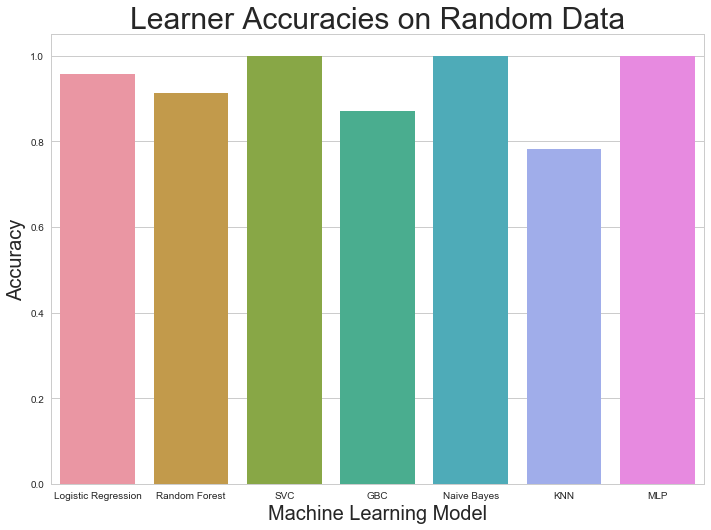

In [37]:
import seaborn as sns
sns.set(style="whitegrid",rc={'figure.figsize':(11.7,8.27)})

b = sns.barplot(data=final, x="learner", y="score")
b.axes.set_title('Learner Accuracies on Random Data',fontsize=30)
b.set_xlabel("Machine Learning Model",fontsize=20)
b.set_ylabel("Accuracy",fontsize=20)
fig = b.get_figure()
fig.savefig("random-classification-accuracies.png")